In [58]:
import os
import numpy as np
import random
import importlib

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model, Sequential, load_model

import Models; importlib.reload(Models)
import utils; importlib.reload(utils)
print('Libraries Loaded')

Libraries Loaded


## Main

In [2]:
## Folders
root = r'C:\Users\saad\Desktop\Image-Background-Removal\COCO Dataset\COCOdataset2017'
annotations = r'annotations'
images = r'images'
pre_imgs = r'Preprocesed_images'

## Training
train_img = 'train'
train_ann = 'instances_train.json'
train_process = 'train_images'

## Validation
val_img = r'val'
val_ann = r'instances_val.json'
val_img_process = 'val_images'
val_ann_process = 'val_ann'


In [3]:
input_name,input_images = utils.read_imgs(os.path.join(root,pre_imgs,val_img_process))
print('Input images done')
output_name,output_images = utils.read_imgs(os.path.join(root,pre_imgs,val_ann_process))
print('Output images done')

Input images done
Output images done


In [4]:
output_images.shape

(2090, 224, 224, 3)

In [5]:
input_processed = input_images/255.
output_processed = output_images[:,:,:,:1]/255.
output_processed[output_processed>=0.5] = 1
output_processed[output_processed<0.5] = 0
output_processed = output_processed.astype(np.int8)

print(f'The shape of the input_process is {input_processed.shape} and the shape of output_processed is {output_processed.shape}')

The shape of the input_process is (2090, 224, 224, 3) and the shape of output_processed is (2090, 224, 224, 1)


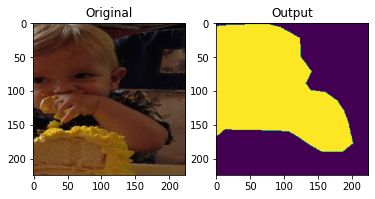

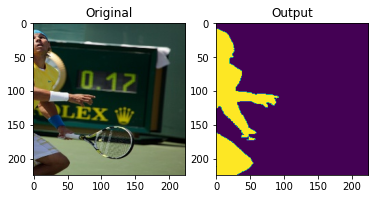

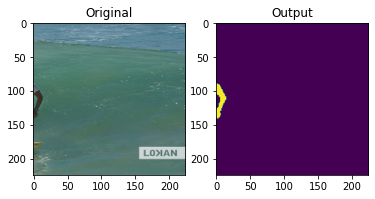

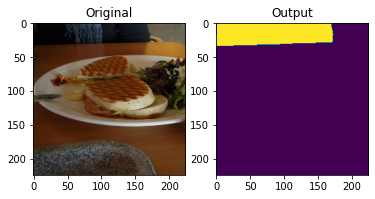

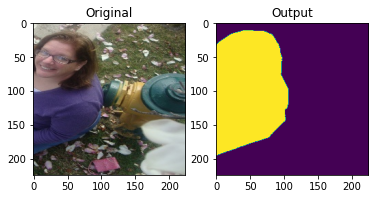

In [6]:
num = random.sample(range(0,len(input_processed)),5)
utils.visualize(input_processed,output_processed,num)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(input_processed,output_processed,test_size=0.2,random_state=42)

print(f'The shape of x_train is {x_train.shape} and the shape of y_train is {y_train.shape}')
print(f'The shape of x_test is {x_test.shape} and the shape of y_test is {y_test.shape}')

The shape of x_train is (1672, 224, 224, 3) and the shape of y_train is (1672, 224, 224, 1)
The shape of x_test is (418, 224, 224, 3) and the shape of y_test is (418, 224, 224, 1)


### Model - UNet

In [46]:
filepath = 'unet.hdf5'
checkpoint =keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True)

input_image = Input((224,224,3))
unet = Models.build_unet(input_image,8,0.6,1,True)

unet.compile(optimizer='adam',loss= 'binary_crossentropy',metrics=['accuracy'])

unet.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 8)  224         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 224, 224, 8)  32          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 224, 224, 8)  0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [47]:
# Start the training process
history = unet.fit(x_train,y_train,validation_split=0.2,batch_size=32,epochs=200,callbacks=[checkpoint])

Epoch 1/200
42/42 [==============================] - 4s 105ms/step - loss: 0.6053 - accuracy: 0.7007 - val_loss: 0.4153 - val_accuracy: 0.8663
Epoch 2/200
42/42 [==============================] - 4s 93ms/step - loss: 0.4665 - accuracy: 0.8382 - val_loss: 0.4036 - val_accuracy: 0.8738
Epoch 3/200
42/42 [==============================] - 4s 93ms/step - loss: 0.4219 - accuracy: 0.8563 - val_loss: 0.3782 - val_accuracy: 0.8743
Epoch 4/200
42/42 [==============================] - 4s 94ms/step - loss: 0.3978 - accuracy: 0.8563 - val_loss: 0.3670 - val_accuracy: 0.8743
Epoch 5/200
42/42 [==============================] - 4s 94ms/step - loss: 0.3803 - accuracy: 0.8563 - val_loss: 0.3606 - val_accuracy: 0.8743
Epoch 6/200
42/42 [==============================] - 4s 94ms/step - loss: 0.3682 - accuracy: 0.8563 - val_loss: 0.3444 - val_accuracy: 0.8743
Epoch 7/200
42/42 [==============================] - 4s 94ms/step - loss: 0.3579 - accuracy: 0.8563 - val_loss: 0.3433 - val_accuracy: 0.8743
Epoch

42/42 [==============================] - 4s 88ms/step - loss: 0.2607 - accuracy: 0.8911 - val_loss: 0.3568 - val_accuracy: 0.8870
Epoch 59/200
42/42 [==============================] - 4s 89ms/step - loss: 0.2611 - accuracy: 0.8894 - val_loss: 0.3743 - val_accuracy: 0.8855
Epoch 60/200
42/42 [==============================] - 4s 88ms/step - loss: 0.2617 - accuracy: 0.8895 - val_loss: 0.3311 - val_accuracy: 0.8841
Epoch 61/200
42/42 [==============================] - 4s 89ms/step - loss: 0.2618 - accuracy: 0.8889 - val_loss: 0.3489 - val_accuracy: 0.8866
Epoch 62/200
42/42 [==============================] - 4s 89ms/step - loss: 0.2608 - accuracy: 0.8907 - val_loss: 0.3337 - val_accuracy: 0.8878
Epoch 63/200
42/42 [==============================] - 4s 89ms/step - loss: 0.2541 - accuracy: 0.8917 - val_loss: 0.3096 - val_accuracy: 0.8803
Epoch 64/200
42/42 [==============================] - 4s 89ms/step - loss: 0.2538 - accuracy: 0.8929 - val_loss: 0.3920 - val_accuracy: 0.8849
Epoch 65/200

42/42 [==============================] - 4s 88ms/step - loss: 0.2157 - accuracy: 0.9091 - val_loss: 0.3485 - val_accuracy: 0.8806
Epoch 116/200
42/42 [==============================] - 4s 89ms/step - loss: 0.2117 - accuracy: 0.9114 - val_loss: 0.3452 - val_accuracy: 0.8830
Epoch 117/200
42/42 [==============================] - 4s 89ms/step - loss: 0.2108 - accuracy: 0.9111 - val_loss: 0.3666 - val_accuracy: 0.8840
Epoch 118/200
42/42 [==============================] - 4s 88ms/step - loss: 0.2072 - accuracy: 0.9127 - val_loss: 0.3757 - val_accuracy: 0.8862
Epoch 119/200
42/42 [==============================] - 4s 88ms/step - loss: 0.2056 - accuracy: 0.9135 - val_loss: 0.4489 - val_accuracy: 0.8812
Epoch 120/200
42/42 [==============================] - 4s 88ms/step - loss: 0.2103 - accuracy: 0.9117 - val_loss: 0.4299 - val_accuracy: 0.8705
Epoch 121/200
42/42 [==============================] - 4s 89ms/step - loss: 0.2075 - accuracy: 0.9125 - val_loss: 0.3689 - val_accuracy: 0.8833
Epoch 

Epoch 172/200
42/42 [==============================] - 4s 89ms/step - loss: 0.1636 - accuracy: 0.9323 - val_loss: 0.5091 - val_accuracy: 0.8849
Epoch 173/200
42/42 [==============================] - 4s 88ms/step - loss: 0.1696 - accuracy: 0.9303 - val_loss: 0.4367 - val_accuracy: 0.8816
Epoch 174/200
42/42 [==============================] - 4s 88ms/step - loss: 0.1583 - accuracy: 0.9357 - val_loss: 0.5776 - val_accuracy: 0.8664
Epoch 175/200
42/42 [==============================] - 4s 88ms/step - loss: 0.1586 - accuracy: 0.9352 - val_loss: 0.5030 - val_accuracy: 0.8720
Epoch 176/200
42/42 [==============================] - 4s 89ms/step - loss: 0.1620 - accuracy: 0.9339 - val_loss: 0.3917 - val_accuracy: 0.8729
Epoch 177/200
42/42 [==============================] - 4s 89ms/step - loss: 0.1633 - accuracy: 0.9326 - val_loss: 0.5216 - val_accuracy: 0.8714
Epoch 178/200
42/42 [==============================] - 4s 89ms/step - loss: 0.1610 - accuracy: 0.9338 - val_loss: 0.4719 - val_accuracy:

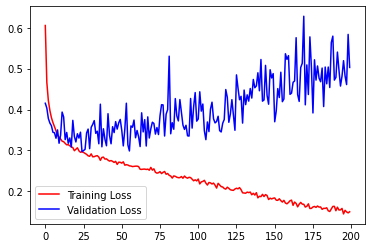

In [48]:
Models.loss_plot(history)

In [53]:
unet.load_weights(filepath)
predictions = unet.predict(x_test)
predictions.shape

(418, 224, 224, 1)

In [54]:
predictions[predictions>0.5]=1
predictions[predictions<=0.5]=0

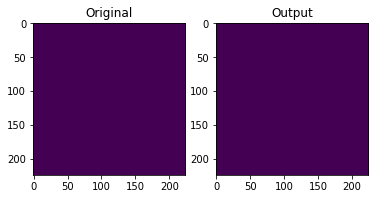

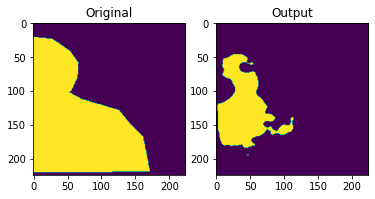

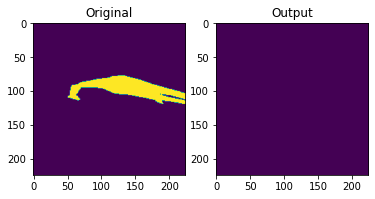

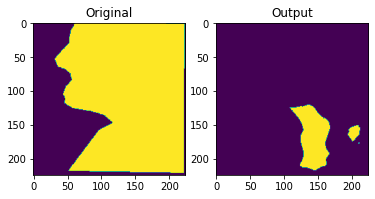

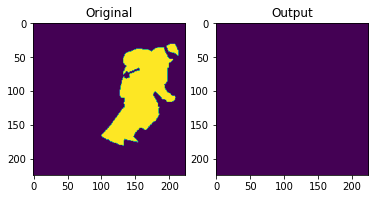

In [55]:
num = random.sample(range(0,len(x_test)),5)
utils.visualize(y_test[:,:,:,:1],predictions,num)

In [56]:
Models.metrics(y_test,predictions)

0.089057029501234

## Models - DeepLab 

In [ ]:
filepath = 'deeplab.hdf5'
checkpoint =keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True)

deeplab = Models.DeepLabV3plus(input_size=(224,224,3),n_classes=1)

deeplab.compile(optimizer='adam',loss= 'binary_crossentropy',metrics=['accuracy'])

# Start the training process
history1 = deeplab.fit(x_train,y_train,validation_split=0.2,batch_size=32,epochs=200,callbacks=[checkpoint])

Epoch 1/200
